In [2]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

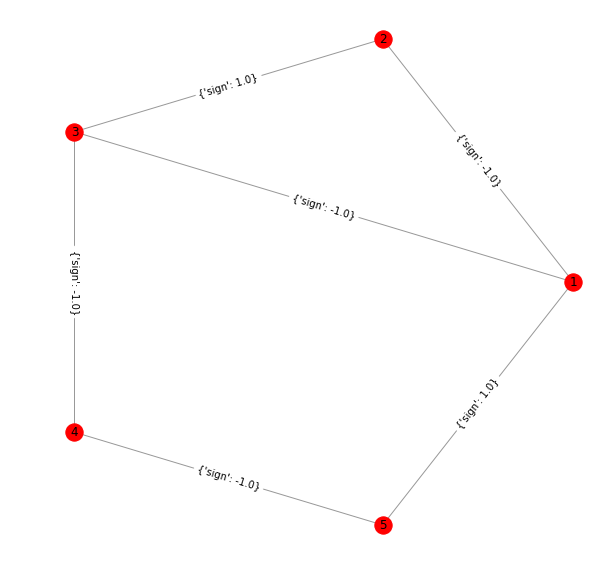

In [91]:
# Create a graph
g = nx.Graph()
g.add_nodes_from([1,2,3,4,5])
g.add_edges_from([(1,2),(1,3),(1,5),(2,3),(4,5),(3,4)])

weight_edges = {}
for i in g.edges():
    weight_edges[i] = np.sign(2*np.random.random()-1)
    
nx.set_edge_attributes(g, weight_edges, name='sign')

pos = nx.circular_layout(g)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_labels(g, pos)

nx.draw_networkx_edges(g,pos, alpha=0.4)
nx.draw_networkx_edge_labels(g,pos)

plt.axis('off')
plt.show()

In [92]:
positive_relationships = [(a, b) for a, b, sign in g.edges(data='sign') if sign>0]
negative_relationships = [(a, b) for a, b, sign in g.edges(data='sign') if sign<0]

In [ ]:
# Select a D-Wave system and handle mapping from problem graph to sampler graph
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave_networkx as dnx

sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))  # Some accounts need to replace this line with the next:
# sampler = EmbeddingComposite(DWaveSampler(solver='paste missing solver name here', token='paste missing API token here'))

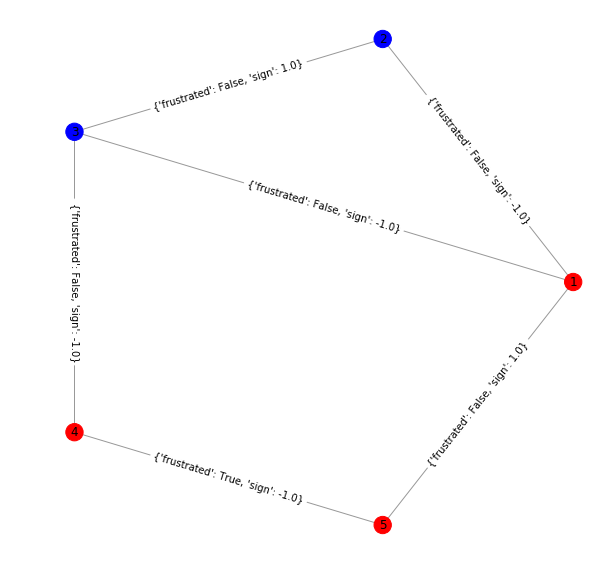

In [94]:
# Return a good partition (minimal structural imbalance) and its frustrated edges  
imbalance, clusters = dnx.structural_imbalance(g, sampler)

# Mark the returned frustrated edges and node set (color) on the graph 
for edge in g.edges:
    g.edges[edge]['frustrated'] = edge in imbalance
for node in g.nodes:
    g.nodes[node]['cluster'] = clusters[node]
    
pos = nx.circular_layout(g)

plt.figure(figsize=(10,10))

node_color = nx.get_node_attributes(g, 'cluster')
color_map = ['red' if color==1 else 'blue'
            for name, color in node_color.items()]
nx.draw_networkx_nodes(g, pos, node_color = color_map)
nx.draw_networkx_labels(g, pos)

nx.draw_networkx_edges(g,pos, alpha=0.4)
labels = nx.get_edge_attributes(G,'frustrated')
nx.draw_networkx_edge_labels(g,pos, labels=labels)

plt.axis('off')
plt.show()